<a href="https://colab.research.google.com/github/7uyash/7uyash/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install praw


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.3 MB/s eta 0:00:00


In [ ]:
import praw


import praw
import pandas as pd
import time

reddit = praw.Reddit(
    client_id='oW9WGJ9VThiHYA1p17Rmgg',
    client_secret='kaTYbLwx2pHtiDzV-fm3xNlsVNs85g',
    user_agent='SentimentAnalysisScriptE'
)


# Function to scrape large-scale data from a subreddit
def scrape_large_subreddit(subreddit_name, keyword, total_limit=50000, batch_size=100):
    subreddit = reddit.subreddit(subreddit_name)
    data = []
    count = 0
    after = None  # Used for pagination

    while count < total_limit:
        try:
            # Get submissions with pagination
            for submission in subreddit.search(keyword, limit=batch_size, params={'after': after}):
                submission.comments.replace_more(limit=0)  # Expand comments
                for comment in submission.comments.list():
                    data.append({
                        'title': submission.title,
                        'body': submission.selftext,
                        'subreddit': subreddit_name,
                        'score': submission.score,
                        'comments_count': submission.num_comments,
                        'comments': comment.body,
                        'created': submission.created_utc,
                        'url': submission.url
                    })
                    count += 1

                    # Break the loop if we reach the total limit
                    if count >= total_limit:
                        break

                # Update pagination marker
                after = submission.name

                # Break the loop if we reach the total limit
                if count >= total_limit:
                    break

            # Save data in batches every 5,000 entries
            if len(data) >= 5000:
                temp_df = pd.DataFrame(data)
                temp_df.to_csv(f'{subreddit_name}_temp_{time.time()}.csv', index=False)
                print(f"Saved 5,000 posts from {subreddit_name}")
                data = []  # Clear data list for the next batch

        except Exception as e:
            print(f"Error: {e}")
            time.sleep(5)  # Wait for a few seconds before retrying

    # Save the remaining data
    df = pd.DataFrame(data)
    df.to_csv(f'{subreddit_name}_Final.csv', index=False)
    print(f"Scraping completed for {subreddit_name}. Total threads: {count}")

# Scrape 50,000 threads for Apple and Samsung
scrape_large_subreddit('Apple', 'iPhone', total_limit=10000)
scrape_large_subreddit('Samsung', 'Samsung Galaxy', total_limit=10000)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Saved 5,000 posts from Apple
Scraping completed for Apple. Total threads: 10000


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Saved 5,000 posts from Samsung
Scraping completed for Samsung. Total threads: 10000


In [4]:
import pandas as pd

# Load the datasets
apple_data = pd.read_csv('/content/drive/MyDrive/Apple_temp_1732263588.2626402.csv')
samsung_data = pd.read_csv('/content/Samsung_temp_1732263645.710388.csv')

# Preview the data
print("Apple Data Sample:")
print(apple_data.head())
print("\nSamsung Data Sample:")
print(samsung_data.head())

# Check the number of entries in each dataset
print(f"Apple data has {len(apple_data)} entries.")
print(f"Samsung data has {len(samsung_data)} entries.")


Apple Data Sample:
                                               title  body subreddit  score  \
0  The iPhone 15 may be obsolete faster than any ...   NaN     Apple   2735   
1  The iPhone 15 may be obsolete faster than any ...   NaN     Apple   2735   
2  The iPhone 15 may be obsolete faster than any ...   NaN     Apple   2735   
3  The iPhone 15 may be obsolete faster than any ...   NaN     Apple   2735   
4  The iPhone 15 may be obsolete faster than any ...   NaN     Apple   2735   

   comments_count                                           comments  \
0             919  I worked in a cell phone store for years aroun...   
1             919  It may be quite a while until Apple intelligen...   
2             919  Everyone is *highly* overestimating the releva...   
3             919  Don't really care about AI features on the pho...   
4             919  Yep obsolete, no longer makes calls, or takes ...   

        created                                                url  
0  1

In [10]:
import nltk
nltk.download('punkt_tab')

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    if pd.isnull(text) or text == '[deleted]':  # Handle NaN and deleted entries
        return ""
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stop words
    return " ".join(tokens)

# Combine title and comments for Apple data
apple_data['Combined_Text'] = (apple_data['title'] + " " + apple_data['comments']).apply(preprocess_text)

# Combine title and comments for Samsung data
samsung_data['Combined_Text'] = (samsung_data['title'] + " " + samsung_data['comments']).apply(preprocess_text)

# Preview cleaned text
print("Sample cleaned Apple data:")
print(apple_data[['title', 'comments', 'Combined_Text']].head())

print("\nSample cleaned Samsung data:")
print(samsung_data[['title', 'comments', 'Combined_Text']].head())


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sample cleaned Apple data:
                                               title  \
0  The iPhone 15 may be obsolete faster than any ...   
1  The iPhone 15 may be obsolete faster than any ...   
2  The iPhone 15 may be obsolete faster than any ...   
3  The iPhone 15 may be obsolete faster than any ...   
4  The iPhone 15 may be obsolete faster than any ...   

                                            comments  \
0  I worked in a cell phone store for years aroun...   
1  It may be quite a while until Apple intelligen...   
2  Everyone is *highly* overestimating the releva...   
3  Don't really care about AI features on the pho...   
4  Yep obsolete, no longer makes calls, or takes ...   

                                       Combined_Text  
0  iphone may obsolete faster model history worke...  
1  iphone may obsolete faster model history may q...  
2  iphone may obsolete faster model history every...  
3  iphone may obsolete faster model history dont ...  
4  iphone may obsolete f

In [12]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to classify sentiment
def classify_sentiment(text):
    if not text:  # Handle empty or missing text
        return "Neutral"
    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0.05:
        return "Positive"
    elif scores['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to Apple data
apple_data['Sentiment'] = apple_data['Combined_Text'].apply(classify_sentiment)

# Apply sentiment analysis to Samsung data
samsung_data['Sentiment'] = samsung_data['Combined_Text'].apply(classify_sentiment)

# Save the results to CSV files
apple_data.to_csv('/content/Apple_Sentiment.csv', index=False)
samsung_data.to_csv('/content/Samsung_Sentiment.csv', index=False)

print("Sentiment analysis completed and saved!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.9 MB/s eta 0:00:00
Sentiment analysis completed and saved!


In [13]:
# Check a sample of the processed Apple data
print("Sample Apple data with Sentiment:")
print(apple_data[['Combined_Text', 'Sentiment']].head())

# Check a sample of the processed Samsung data
print("\nSample Samsung data with Sentiment:")
print(samsung_data[['Combined_Text', 'Sentiment']].head())


Sample Apple data with Sentiment:
                                       Combined_Text Sentiment
0  iphone may obsolete faster model history worke...  Positive
1  iphone may obsolete faster model history may q...  Positive
2  iphone may obsolete faster model history every...  Positive
3  iphone may obsolete faster model history dont ...  Negative
4  iphone may obsolete faster model history yep o...  Negative

Sample Samsung data with Sentiment:
                                       Combined_Text Sentiment
0                  samsung galaxy ultra joke deleted  Positive
1  samsung galaxy ultra joke dont know happens ph...  Positive
2  samsung galaxy ultra joke product come doa tha...  Negative
3  samsung galaxy ultra joke vision perfect dont ...  Positive
4  samsung galaxy ultra joke hear story give symp...  Positive


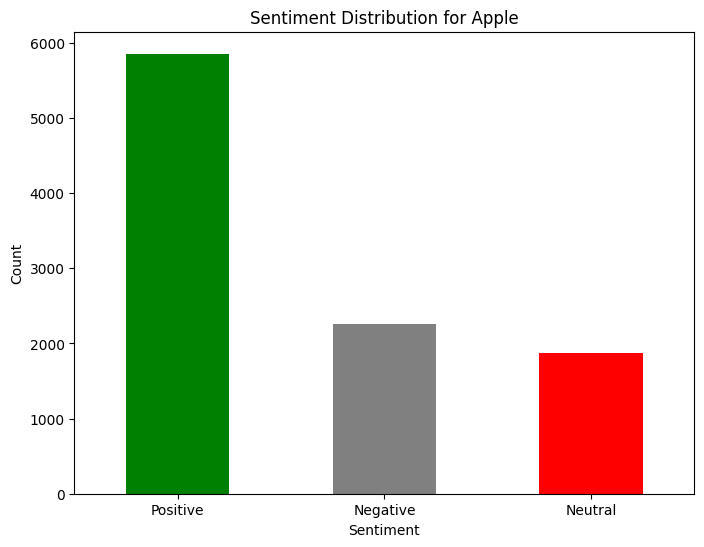

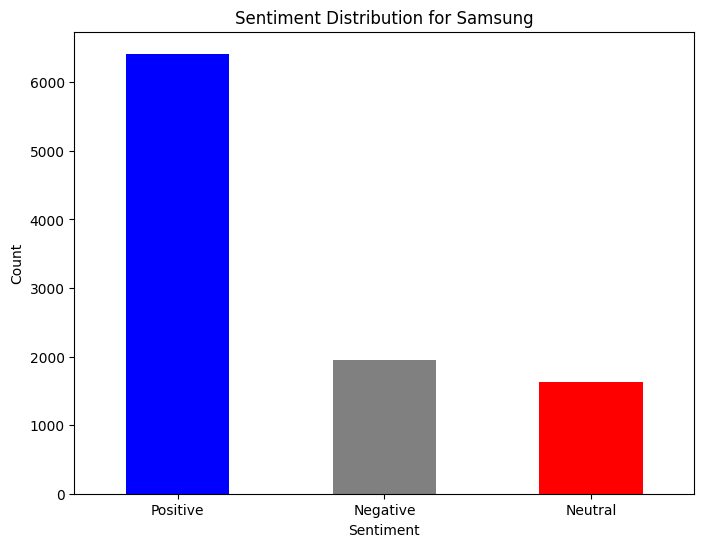

In [14]:
import matplotlib.pyplot as plt

# Count sentiment distribution for Apple
apple_sentiment_counts = apple_data['Sentiment'].value_counts()

# Count sentiment distribution for Samsung
samsung_sentiment_counts = samsung_data['Sentiment'].value_counts()

# Plot sentiment distribution for Apple
plt.figure(figsize=(8, 6))
apple_sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution for Apple')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot sentiment distribution for Samsung
plt.figure(figsize=(8, 6))
samsung_sentiment_counts.plot(kind='bar', color=['blue', 'gray', 'red'])
plt.title('Sentiment Distribution for Samsung')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [18]:
import nltk
nltk.data.path.append('/root/nltk_data')  # Ensure the data path is correct

# Verify the correct resource is available
try:
    nltk.find('taggers/averaged_perceptron_tagger')
    print("Correct resource is available!")
except LookupError:
    print("Correct resource not found. Downloading...")
    nltk.download('averaged_perceptron_tagger')


Correct resource is available!


In [20]:
import nltk
nltk.download('punkt')  # For tokenization
nltk.download('averaged_perceptron_tagger')  # For POS tagging


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
# Check for 'punkt' and 'averaged_perceptron_tagger'
try:
    nltk.find('tokenizers/punkt')
    print("'punkt' tokenizer is available!")
except LookupError:
    print("Downloading 'punkt' tokenizer...")
    nltk.download('punkt')

try:
    nltk.find('taggers/averaged_perceptron_tagger')
    print("'averaged_perceptron_tagger' is available!")
except LookupError:
    print("Downloading 'averaged_perceptron_tagger'...")
    nltk.download('averaged_perceptron_tagger')


'punkt' tokenizer is available!
'averaged_perceptron_tagger' is available!


In [22]:
import nltk
nltk.data.path.append('/root/nltk_data/')  # Specify your correct NLTK data path


In [27]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [30]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')
import pandas as pd

# Reload the datasets
apple_sentiment_data = pd.read_csv('/content/Apple_Sentiment.csv')
samsung_sentiment_data = pd.read_csv('/content/Samsung_Sentiment.csv')

# Check the first few rows of both datasets
print("Apple Sentiment Data Sample:")
print(apple_sentiment_data.head())

print("\nSamsung Sentiment Data Sample:")
print(samsung_sentiment_data.head())

# Function to extract nouns (aspects) from text
def batch_aspect_extraction(data, column_name, batch_size=500):
    # Process text data in batches
    aspects_list = []
    for i in range(0, len(data), batch_size):
        batch = data[column_name][i:i+batch_size].dropna().tolist()  # Select a batch
        docs = list(nlp.pipe(batch, disable=["parser", "ner"]))  # Use spaCy's pipe for faster processing
        for doc in docs:
            aspects = [token.text for token in doc if token.pos_ in ['NOUN']]  # Extract nouns
            aspects_list.append(aspects)
        print(f"Processed {i + batch_size} rows...")  # Progress feedback
    return aspects_list

# Apply batch aspect extraction to Apple and Samsung data
apple_sentiment_data['Aspects'] = batch_aspect_extraction(apple_sentiment_data, 'Combined_Text')
samsung_sentiment_data['Aspects'] = batch_aspect_extraction(samsung_sentiment_data, 'Combined_Text')

# Save the results
apple_sentiment_data.to_csv('/content/Apple_Aspects.csv', index=False)
samsung_sentiment_data.to_csv('/content/Samsung_Aspects.csv', index=False)

print("Batch aspect extraction completed and saved!")


Apple Sentiment Data Sample:
                                               title  body subreddit  score  \
0  The iPhone 15 may be obsolete faster than any ...   NaN     Apple   2735   
1  The iPhone 15 may be obsolete faster than any ...   NaN     Apple   2735   
2  The iPhone 15 may be obsolete faster than any ...   NaN     Apple   2735   
3  The iPhone 15 may be obsolete faster than any ...   NaN     Apple   2735   
4  The iPhone 15 may be obsolete faster than any ...   NaN     Apple   2735   

   comments_count                                           comments  \
0             919  I worked in a cell phone store for years aroun...   
1             919  It may be quite a while until Apple intelligen...   
2             919  Everyone is *highly* overestimating the releva...   
3             919  Don't really care about AI features on the pho...   
4             919  Yep obsolete, no longer makes calls, or takes ...   

        created                                                

In [31]:
print("Apple Aspects Sample:")
print(apple_sentiment_data[['Combined_Text', 'Aspects']].head())

print("\nSamsung Aspects Sample:")
print(samsung_sentiment_data[['Combined_Text', 'Aspects']].head())


Apple Aspects Sample:
                                       Combined_Text  \
0  iphone may obsolete faster model history worke...   
1  iphone may obsolete faster model history may q...   
2  iphone may obsolete faster model history every...   
3  iphone may obsolete faster model history dont ...   
4  iphone may obsolete faster model history yep o...   

                                             Aspects  
0  [iphone, model, history, cell, phone, store, y...  
1  [iphone, model, history, apple, intelligence, ...  
2  [iphone, model, history, relevance, impact, ap...  
3     [iphone, model, history, feature, phone, year]  
4  [iphone, model, history, call, photo, browse, ...  

Samsung Aspects Sample:
                                       Combined_Text  \
0                  samsung galaxy ultra joke deleted   
1  samsung galaxy ultra joke dont know happens ph...   
2  samsung galaxy ultra joke product come doa tha...   
3  samsung galaxy ultra joke vision perfect dont ...   
4  sam

In [54]:
from collections import Counter

# Flatten the list of aspects for frequency analysis
apple_aspects = [aspect for aspects in apple_sentiment_data['Aspects'] for aspect in aspects]
samsung_aspects = [aspect for aspects in samsung_sentiment_data['Aspects'] for aspect in aspects]

# Get the most common aspects
apple_common_aspects = Counter(apple_aspects).most_common(20)
samsung_common_aspects = Counter(samsung_aspects).most_common(20)

print("Most Common Aspects in Apple Reviews:")
print(apple_common_aspects)

print("\nMost Common Aspects in Samsung Reviews:")
print(samsung_common_aspects)


Most Common Aspects in Apple Reviews:
[("'", 200404), (',', 90202), (' ', 90202), ('e', 84636), ('p', 57287), ('o', 49345), ('a', 44420), ('i', 41270), ('n', 39357), ('r', 38090), ('t', 31955), ('l', 29238), ('s', 24390), ('h', 22871), ('c', 22255), ('m', 15579), ('d', 15202), ('u', 14031), ('y', 10238), ('[', 10000)]

Most Common Aspects in Samsung Reviews:
[("'", 164376), (',', 72487), (' ', 72487), ('e', 64551), ('a', 43126), ('o', 32553), ('r', 30692), ('n', 29813), ('t', 29611), ('s', 27375), ('i', 27330), ('p', 24379), ('l', 20979), ('c', 18815), ('g', 15701), ('h', 15376), ('d', 13307), ('y', 13101), ('u', 12301), ('m', 11784)]


In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to assign sentiment to each aspect
def batch_aspect_sentiment(data, text_column, aspects_column, batch_size=1000):
    results = []
    for start in range(0, len(data), batch_size):
        batch = data.iloc[start:start + batch_size]  # Get a batch of rows
        batch_results = []
        for _, row in batch.iterrows():
            text = row[text_column]
            aspects = eval(row[aspects_column])  # Convert string representation of list to actual list
            aspect_sentiments = {}
            for aspect in aspects:
                if aspect in text:
                    sentiment_score = analyzer.polarity_scores(text)['compound']
                    aspect_sentiments[aspect] = sentiment_score
            batch_results.append(aspect_sentiments)
        results.extend(batch_results)
        print(f"Processed {start + len(batch)} rows out of {len(data)}")
    return results

# Load the datasets
apple_aspects_data = pd.read_csv('/content/Apple_Aspects.csv')
samsung_aspects_data = pd.read_csv('/content/Samsung_Aspects.csv')

# Apply batch aspect sentiment analysis
apple_aspects_data['Aspect_Sentiments'] = batch_aspect_sentiment(apple_aspects_data, 'Combined_Text', 'Aspects')
samsung_aspects_data['Aspect_Sentiments'] = batch_aspect_sentiment(samsung_aspects_data, 'Combined_Text', 'Aspects')

# Save the results
apple_aspects_data.to_csv('/content/Apple_Aspect_Sentiments.csv', index=False)
samsung_aspects_data.to_csv('/content/Samsung_Aspect_Sentiments.csv', index=False)

print("Batch aspect sentiment analysis completed and saved!")


Processed 1000 rows out of 10000
Processed 2000 rows out of 10000
Processed 3000 rows out of 10000
Processed 4000 rows out of 10000
Processed 5000 rows out of 10000
Processed 6000 rows out of 10000
Processed 7000 rows out of 10000
Processed 8000 rows out of 10000
Processed 9000 rows out of 10000
Processed 10000 rows out of 10000
Processed 1000 rows out of 10000
Processed 2000 rows out of 10000
Processed 3000 rows out of 10000
Processed 4000 rows out of 10000
Processed 5000 rows out of 10000
Processed 6000 rows out of 10000
Processed 7000 rows out of 10000
Processed 8000 rows out of 10000
Processed 9000 rows out of 10000
Processed 10000 rows out of 10000
Batch aspect sentiment analysis completed and saved!


In [42]:
from collections import defaultdict

# Function to summarize sentiment for each aspect
def summarize_aspect_sentiments(data):
    aspect_summary = defaultdict(lambda: {'Positive': 0, 'Neutral': 0, 'Negative': 0})

    for _, row in data.iterrows():
        for aspect, score in eval(row['Aspect_Sentiments']).items():
            if score > 0.05:
                aspect_summary[aspect]['Positive'] += 1
            elif score < -0.05:
                aspect_summary[aspect]['Negative'] += 1
            else:
                aspect_summary[aspect]['Neutral'] += 1

    return aspect_summary

# Load the sentiment data
apple_sentiment_data = pd.read_csv('/content/Apple_Aspect_Sentiments.csv')
samsung_sentiment_data = pd.read_csv('/content/Samsung_Aspect_Sentiments.csv')

# Summarize sentiments
apple_aspect_summary = summarize_aspect_sentiments(apple_sentiment_data)
samsung_aspect_summary = summarize_aspect_sentiments(samsung_sentiment_data)

# Display summary for Apple
print("Apple Aspect Sentiment Summary:")
for aspect, counts in apple_aspect_summary.items():
    print(f"{aspect}: {counts}")

# Display summary for Samsung
print("\nSamsung Aspect Sentiment Summary:")
for aspect, counts in samsung_aspect_summary.items():
    print(f"{aspect}: {counts}")


Streaming output truncated to the last 5000 lines.
entry: {'Positive': 3, 'Neutral': 0, 'Negative': 1}
wifi: {'Positive': 28, 'Neutral': 4, 'Negative': 12}
simcity: {'Positive': 1, 'Neutral': 0, 'Negative': 0}
buildit: {'Positive': 1, 'Neutral': 0, 'Negative': 0}
burner: {'Positive': 3, 'Neutral': 0, 'Negative': 0}
tracfone: {'Positive': 2, 'Neutral': 0, 'Negative': 0}
father: {'Positive': 2, 'Neutral': 0, 'Negative': 0}
protector: {'Positive': 20, 'Neutral': 2, 'Negative': 5}
think: {'Positive': 54, 'Neutral': 3, 'Negative': 9}
investment: {'Positive': 4, 'Neutral': 0, 'Negative': 0}
seller: {'Positive': 3, 'Neutral': 0, 'Negative': 0}
need: {'Positive': 108, 'Neutral': 8, 'Negative': 43}
vote: {'Positive': 5, 'Neutral': 0, 'Negative': 1}
decent: {'Positive': 2, 'Neutral': 0, 'Negative': 0}
ram: {'Positive': 13, 'Neutral': 6, 'Negative': 6}
amdroid: {'Positive': 1, 'Neutral': 0, 'Negative': 0}
play: {'Positive': 27, 'Neutral': 0, 'Negative': 3}
video: {'Positive': 119, 'Neutral': 15, 

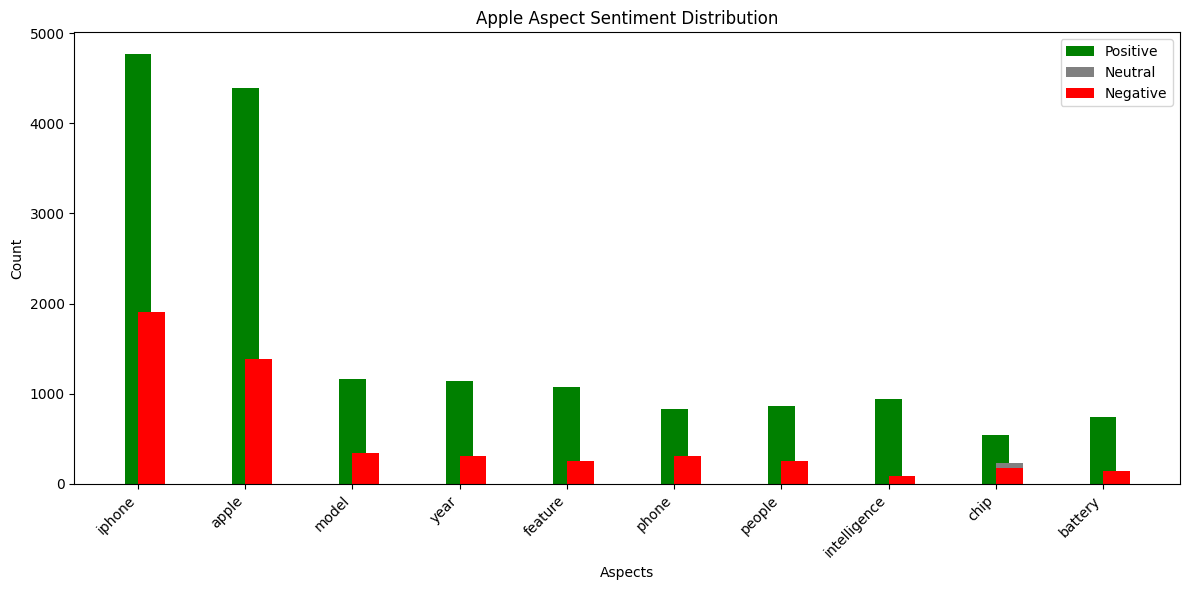

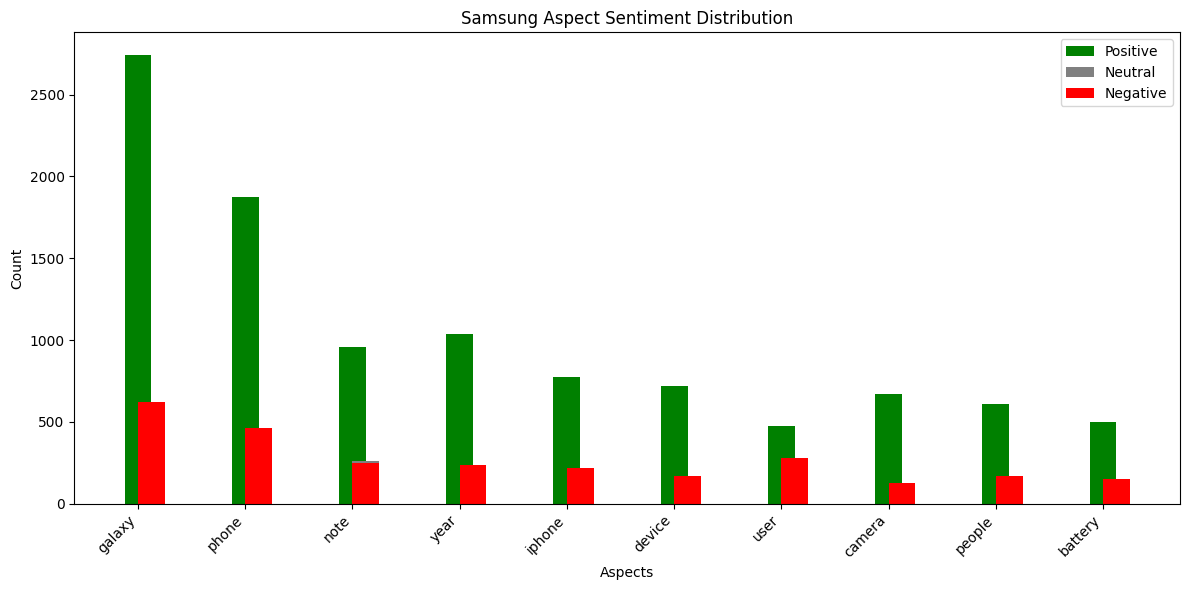

In [45]:
import matplotlib.pyplot as plt

# Function to get top-N aspects
def get_top_n_aspects(aspect_summary, n=10):
    return dict(sorted(aspect_summary.items(), key=lambda item: sum(item[1].values()), reverse=True)[:n])

# Function to plot aspect sentiment distribution
def plot_aspect_sentiments(aspect_summary, title, top_n=10):
    # Get top-N aspects
    aspect_summary = get_top_n_aspects(aspect_summary, top_n)

    aspects = list(aspect_summary.keys())
    positive = [aspect_summary[aspect]['Positive'] for aspect in aspects]
    neutral = [aspect_summary[aspect]['Neutral'] for aspect in aspects]
    negative = [aspect_summary[aspect]['Negative'] for aspect in aspects]

    x = range(len(aspects))

    plt.figure(figsize=(12, 6))
    plt.bar(x, positive, width=0.25, label='Positive', color='green', align='center')
    plt.bar(x, neutral, width=0.25, label='Neutral', color='gray', align='edge')
    plt.bar(x, negative, width=0.25, label='Negative', color='red', align='edge')
    plt.xticks(x, aspects, rotation=45, ha='right')
    plt.xlabel('Aspects')
    plt.ylabel('Count')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot for Apple
plot_aspect_sentiments(apple_aspect_summary, 'Apple Aspect Sentiment Distribution', top_n=10)

# Plot for Samsung
plot_aspect_sentiments(samsung_aspect_summary, 'Samsung Aspect Sentiment Distribution', top_n=10)


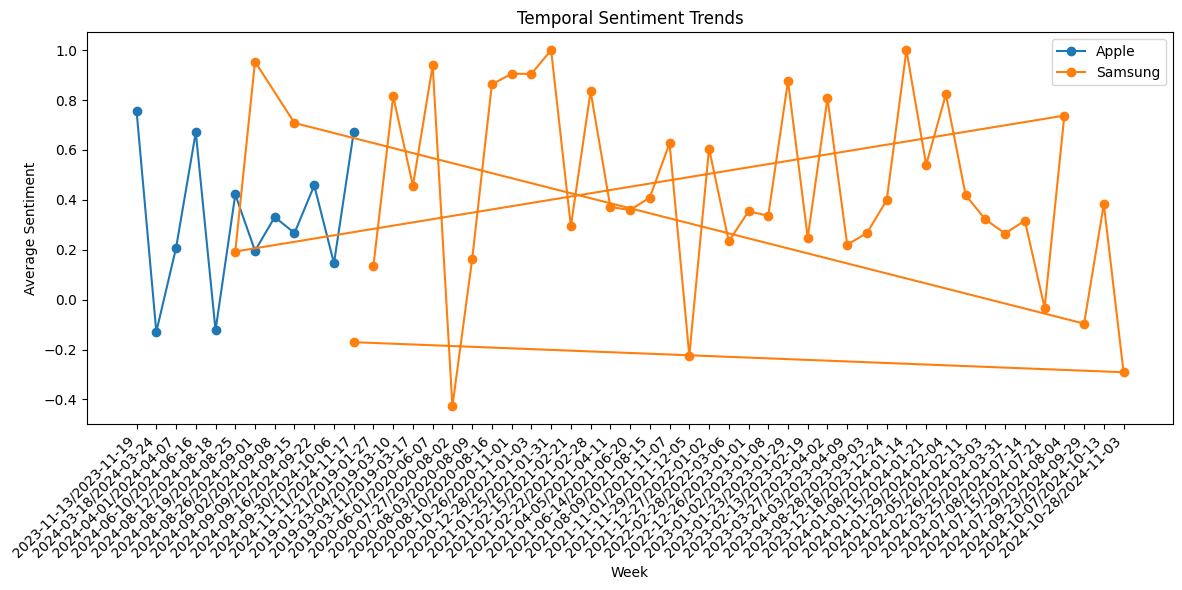

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
apple_sentiment_data = pd.read_csv('/content/Apple_Aspect_Sentiments.csv')
samsung_sentiment_data = pd.read_csv('/content/Samsung_Aspect_Sentiments.csv')

# Convert the 'created' column to datetime
apple_sentiment_data['created'] = pd.to_datetime(apple_sentiment_data['created'], unit='s')
samsung_sentiment_data['created'] = pd.to_datetime(samsung_sentiment_data['created'], unit='s')

# Map sentiment labels to numerical values
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
apple_sentiment_data['Sentiment_Numerical'] = apple_sentiment_data['Sentiment'].map(sentiment_mapping)
samsung_sentiment_data['Sentiment_Numerical'] = samsung_sentiment_data['Sentiment'].map(sentiment_mapping)

# Group data by week and calculate average sentiment
apple_temporal = apple_sentiment_data.groupby(apple_sentiment_data['created'].dt.to_period('W')).agg({
    'Sentiment_Numerical': 'mean'
}).reset_index()

samsung_temporal = samsung_sentiment_data.groupby(samsung_sentiment_data['created'].dt.to_period('W')).agg({
    'Sentiment_Numerical': 'mean'
}).reset_index()

# Rename columns for clarity
apple_temporal.columns = ['Week', 'Average_Sentiment']
samsung_temporal.columns = ['Week', 'Average_Sentiment']

# Plot temporal sentiment trends
plt.figure(figsize=(12, 6))
plt.plot(apple_temporal['Week'].astype(str), apple_temporal['Average_Sentiment'], label='Apple', marker='o')
plt.plot(samsung_temporal['Week'].astype(str), samsung_temporal['Average_Sentiment'], label='Samsung', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Week')
plt.ylabel('Average Sentiment')
plt.title('Temporal Sentiment Trends')
plt.legend()
plt.tight_layout()
plt.show()


Overall Average Sentiment for Apple: 0.36
Overall Average Sentiment for Samsung: 0.45


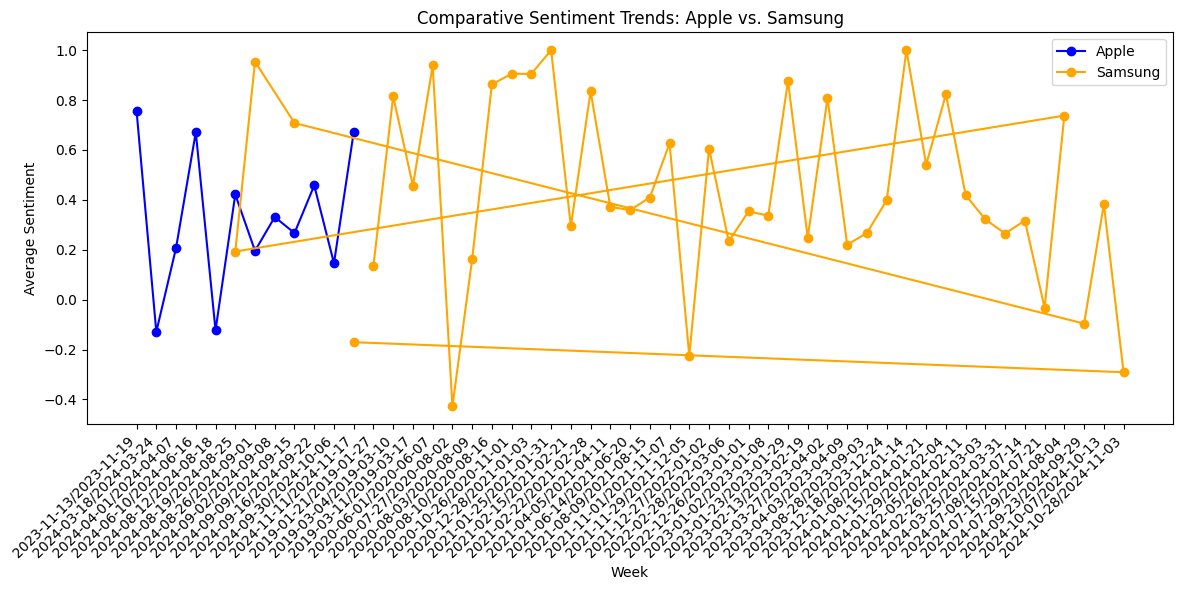

In [49]:
# Function to calculate overall average sentiment
def calculate_overall_average(data):
    return data['Sentiment_Numerical'].mean()

# Calculate overall average sentiment for Apple and Samsung
apple_avg_sentiment = calculate_overall_average(apple_sentiment_data)
samsung_avg_sentiment = calculate_overall_average(samsung_sentiment_data)

# Display the results
print(f"Overall Average Sentiment for Apple: {apple_avg_sentiment:.2f}")
print(f"Overall Average Sentiment for Samsung: {samsung_avg_sentiment:.2f}")

# Plot the temporal comparison
plt.figure(figsize=(12, 6))
plt.plot(apple_temporal['Week'].astype(str), apple_temporal['Average_Sentiment'], label='Apple', marker='o', color='blue')
plt.plot(samsung_temporal['Week'].astype(str), samsung_temporal['Average_Sentiment'], label='Samsung', marker='o', color='orange')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Week')
plt.ylabel('Average Sentiment')
plt.title('Comparative Sentiment Trends: Apple vs. Samsung')
plt.legend()
plt.tight_layout()
plt.show()
